In [ ]:
## News Mood

#In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity 
#of various news oulets, and to present your findings visually.

#Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by 
#the following news organizations: __BBC, CBS, CNN, Fox, and New York times__.

#The first plot will be and/or feature the following:

# 1. Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization,
# ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative
# sentiment possible, and +1 the most positive sentiment possible.
# 2. Each plot point will reflect the _compound_ sentiment of a tweet.
# 3. Sort each plot point by its relative timestamp.

#The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each
#organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

# As final considerations:

# Use the Matplotlib and Seaborn libraries.
# Include a written description of three observable trends based on the data. 
# Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
# Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  



In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = 'HZxj2qcAJZ2R3zAa2cU3HNqWe'
consumer_secret = '0lbOORr4xizTCF0xRsNFmjzIM1g84f4ZneeyWgP9TTYVMvkp2z'
access_token = '942947132796944384-GHrQUnjFYUvUw7LGMO7hApR9DvJcz0l'
access_token_secret = 'ssm9sSjlsjYLkodD0mHtgOi1vtfSaAyi2Gc3a4tvcY43X'

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [2]:
# Pull last 100 tweets from: BBC, CBS, CNN, Fox, and New York times
# Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 

target_user_list =["@BBC", "@CBS", "@CNN", "@Fox", "@NYT"]

# Variables for holding information and sentiments
account_list = []
text_list = []
date_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through list of target users
for target_user in target_user_list:
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            
            #print(tweet["text"].lower())
            
            # Analyze the sentiment of the tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # Add the sentiment analyses to the respective lists
            account_list.append(target_user)
            text_list.append(tweet["text"].lower())
            date_list.append(tweet["created_at"])
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neu)
            neutral_list.append(neg)
            
          

In [3]:
# Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, 
# and negative sentiment scores.
# Export the data in the DataFrame into a CSV file.

newsanalysis_data = {"Tweet_account": account_list,
                     "text": text_list,
                     "Date": date_list,
                     "Compound": compound_list, 
                     "Positive": positive_list, 
                     "Neutral":neutral_list,
                     "Negative": negative_list }

newsanalysis_data = pd.DataFrame(newsanalysis_data)

#write all the info in the csv file
newsanalysis_data.to_csv('newsanalysisfile.csv', index=True, header=True)
        
newsanalysis_data.head(5)


,Compound,Date,Negative,Neutral,Positive,Tweet_account,text
0,0.0000,Mon Jan 08 19:37:04 +0000 2018,1.000,0.000,0.000,@BBC,"tonight, go beyond the theatre doors and disco..."
1,0.1779,Mon Jan 08 19:02:01 +0000 2018,0.793,0.088,0.119,@BBC,"🦌❄ the moment a moose, which got stuck up to i..."
2,-0.1260,Mon Jan 08 18:32:04 +0000 2018,0.923,0.077,0.000,@BBC,🏝😁 this year you can get 24 days off in a row ...
3,0.0000,Mon Jan 08 18:02:04 +0000 2018,1.000,0.000,0.000,@BBC,🎒📚 it was a big day for princess charlotte tod...
4,0.0000,Mon Jan 08 17:30:06 +0000 2018,1.000,0.000,0.000,@BBC,♿✈this mum is taking on the global airline ind...


C:\Users\Beheshteh\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


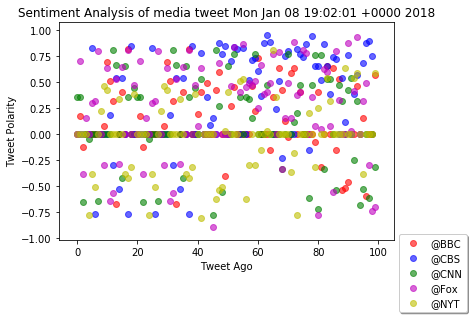

In [4]:
#The first plot will be and/or feature the following:

# 1. Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization,
# ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative
# sentiment possible, and +1 the most positive sentiment possible.
# 2. Each plot point will reflect the _compound_ sentiment of a tweet.
# 3. Sort each plot point by its relative timestamp.

# Save PNG images for each plot.

colors = ['r', 'b', 'g', 'm', 'y']
fig = plt.figure() 
colorcount = 0

for user in target_user_list:
    
    ax1 = fig.add_subplot(111)
    user_account = newsanalysis_data[newsanalysis_data.Tweet_account == user]
    compound =  user_account["Compound"]
    
    ax1.scatter(range(len(compound)), compound,
                marker="o", color=colors[colorcount], alpha=0.6, label= user) 
        
    colorcount += 1

# Incorporate the other graph properties
ax1.set_title("Sentiment Analysis of media tweet " + newsanalysis_data["Date"][1])   
ax1.set_xlabel("Tweet Ago")
ax1.set_ylabel("Tweet Polarity")
ax1.legend(loc='upper left', bbox_to_anchor=(1,.05),
          ncol=1, fancybox=True, shadow=True)


plt.savefig("output_newsAnalysis.png")
plt.show()

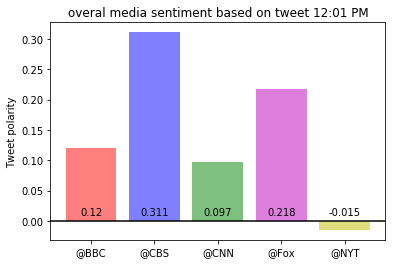

In [5]:
#The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each
#organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

fig = plt.figure()
tick_locations = 0
colorcount = 0

for user in target_user_list:
    
    user_account = newsanalysis_data[newsanalysis_data.Tweet_account == user]
    compound_avar =  user_account["Compound"].mean()
    
    plt.bar(tick_locations, round(compound_avar, 3), alpha=0.5, color=colors[colorcount], align='center')    
    plt.text(tick_locations, 0.009, str(round(compound_avar, 3)), ha = 'center', color='black')
                 
    tick_locations +=1
    colorcount += 1
    
    
tick_locations = np.arange(len(target_user_list))

plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
plt.xticks(tick_locations, target_user_list)
plt.ylabel('Tweet polarity')
plt.title("overal media sentiment based on tweet " + datetime.now().strftime("%I:%M %p"))        
plt.savefig("output_newsAnalysis_bargraph.png")
plt.show()
    